# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

# export KAGGLE_USERNAME=datadinosaur
# export KAGGLE_KEY=xxxxxxxxxxxxxx
os.environ['KAGGLE_USERNAME'] = 'brightly'
os.environ['KAGGLE_KEY'] = 'e7db7871573e0698cd02df64c5e10be6'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
!kaggle datasets download -d andrewmvd/heart-failure-clinical-datab

# Linux 명령어로 압축 해제하기, 같은 이름의 파일이 존재하면 옵션창이 나타나므로 없도록 한 후 압축해제
!unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [2]:
!ls

Chapter 01 - �뜲�씠�꽣 遺꾩꽍�쑝濡� �떖遺��쟾利앹쓣 �삁諛⑺븷 �닔 �엳�쓣源�(臾몄젣).ipynb
heart_failure_clinical_records_dataset.csv


In [3]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [5]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<ul>
<li>타  겟: DEATH_EVENT </li>
<li>범주형: anaemia, diabetes, high_blood_pressure, sex, smoking </li>
<li>수치형: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time</li>
</ul>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
#범주형 변수(0,1로 구성)의 비율 보기
df.describe()[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].loc['mean']
# df.describe()['smoking']

anaemia                0.431438
diabetes               0.418060
high_blood_pressure    0.351171
sex                    0.648829
smoking                0.321070
DEATH_EVENT            0.321070
Name: mean, dtype: float64

### 문제 5. 수치형 데이터의 히스토그램 그리기


 #### 개인과제: 성별 담배를 많이 피는 정도 ? [범주형 * 카운트] * 범주형

##### > 시각화

In [ ]:
## 참고(선이 최소최대를 의미하지않음): sns.pointplot(data = df, x = 'sex', y = 'smoking')
sns.countplot(data = df, x = 'sex', hue = 'smoking')

##### > 표

In [82]:
#pivot_table을 이용해 각 케이스를 카운팅한다
## print(df['sex'].value_counts())
print(df.pivot_table(index = 'sex', columns = 'smoking', aggfunc = 'count')['DEATH_EVENT'])
#이렇게 하면 안됨 : print(df.pivot_table(index = 'sex', columns = 'smoking', aggfunc = 'mean')['DEATH_EVENT'])

#groupby를 이용해 구체적인 비율을 본다
print(df.groupby('sex').mean()['smoking'])

smoking    0   1
sex             
0        101   4
1        102  92
sex
0    0.038095
1    0.474227
Name: smoking, dtype: float64


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

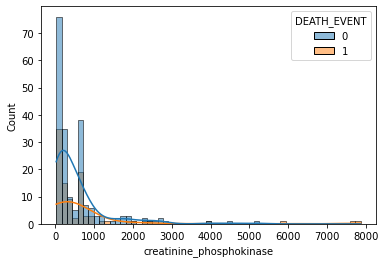

In [25]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x = 'age', data = df, hue = 'DEATH_EVENT', kde = True )
#주요변수: ejection_fraction, serum_creatinine
# sns.histplot(data = df, x = 'ejection_fraction')
# sns.histplot(data = df, x = 'serum_creatinine')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

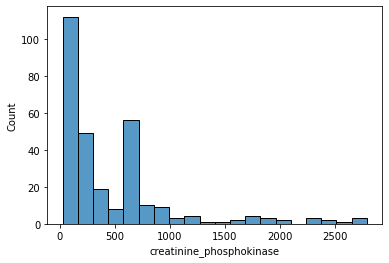

In [33]:
sns.histplot(data = df.loc[df['creatinine_phosphokinase']<3000, 'creatinine_phosphokinase' ])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

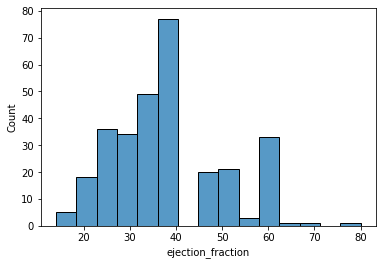

In [38]:
sns.histplot(x = 'ejection_fraction', data = df,bins = 15)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

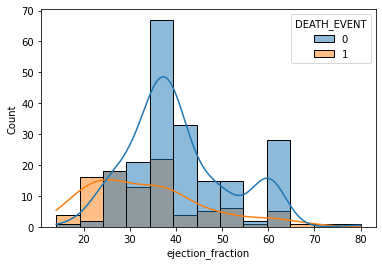

In [39]:
sns.histplot(x = 'ejection_fraction', data = df,bins = 13, hue= 'DEATH_EVENT', kde = True)

In [41]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='platelets', ylabel='Count'>

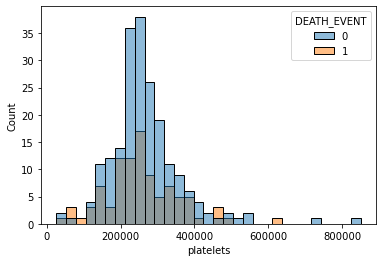

In [44]:
sns.histplot(x = 'platelets', data = df, hue = 'DEATH_EVENT')

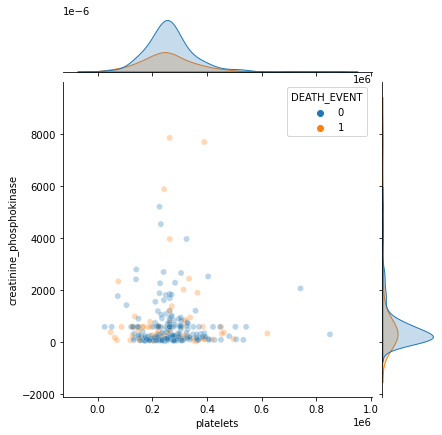

In [46]:
sns.jointplot(data = df, x = 'platelets', y = 'creatinine_phosphokinase', hue = 'DEATH_EVENT', alpha = 0.3)

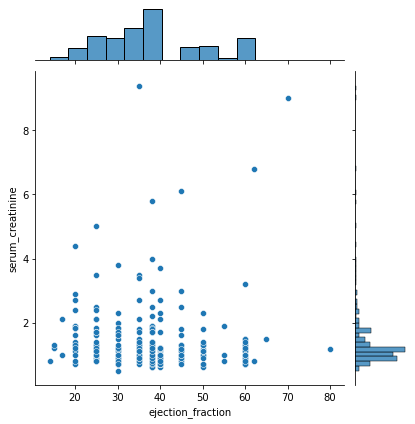

In [11]:
sns.jointplot(data = df, x = 'ejection_fraction', y = 'serum_creatinine' )

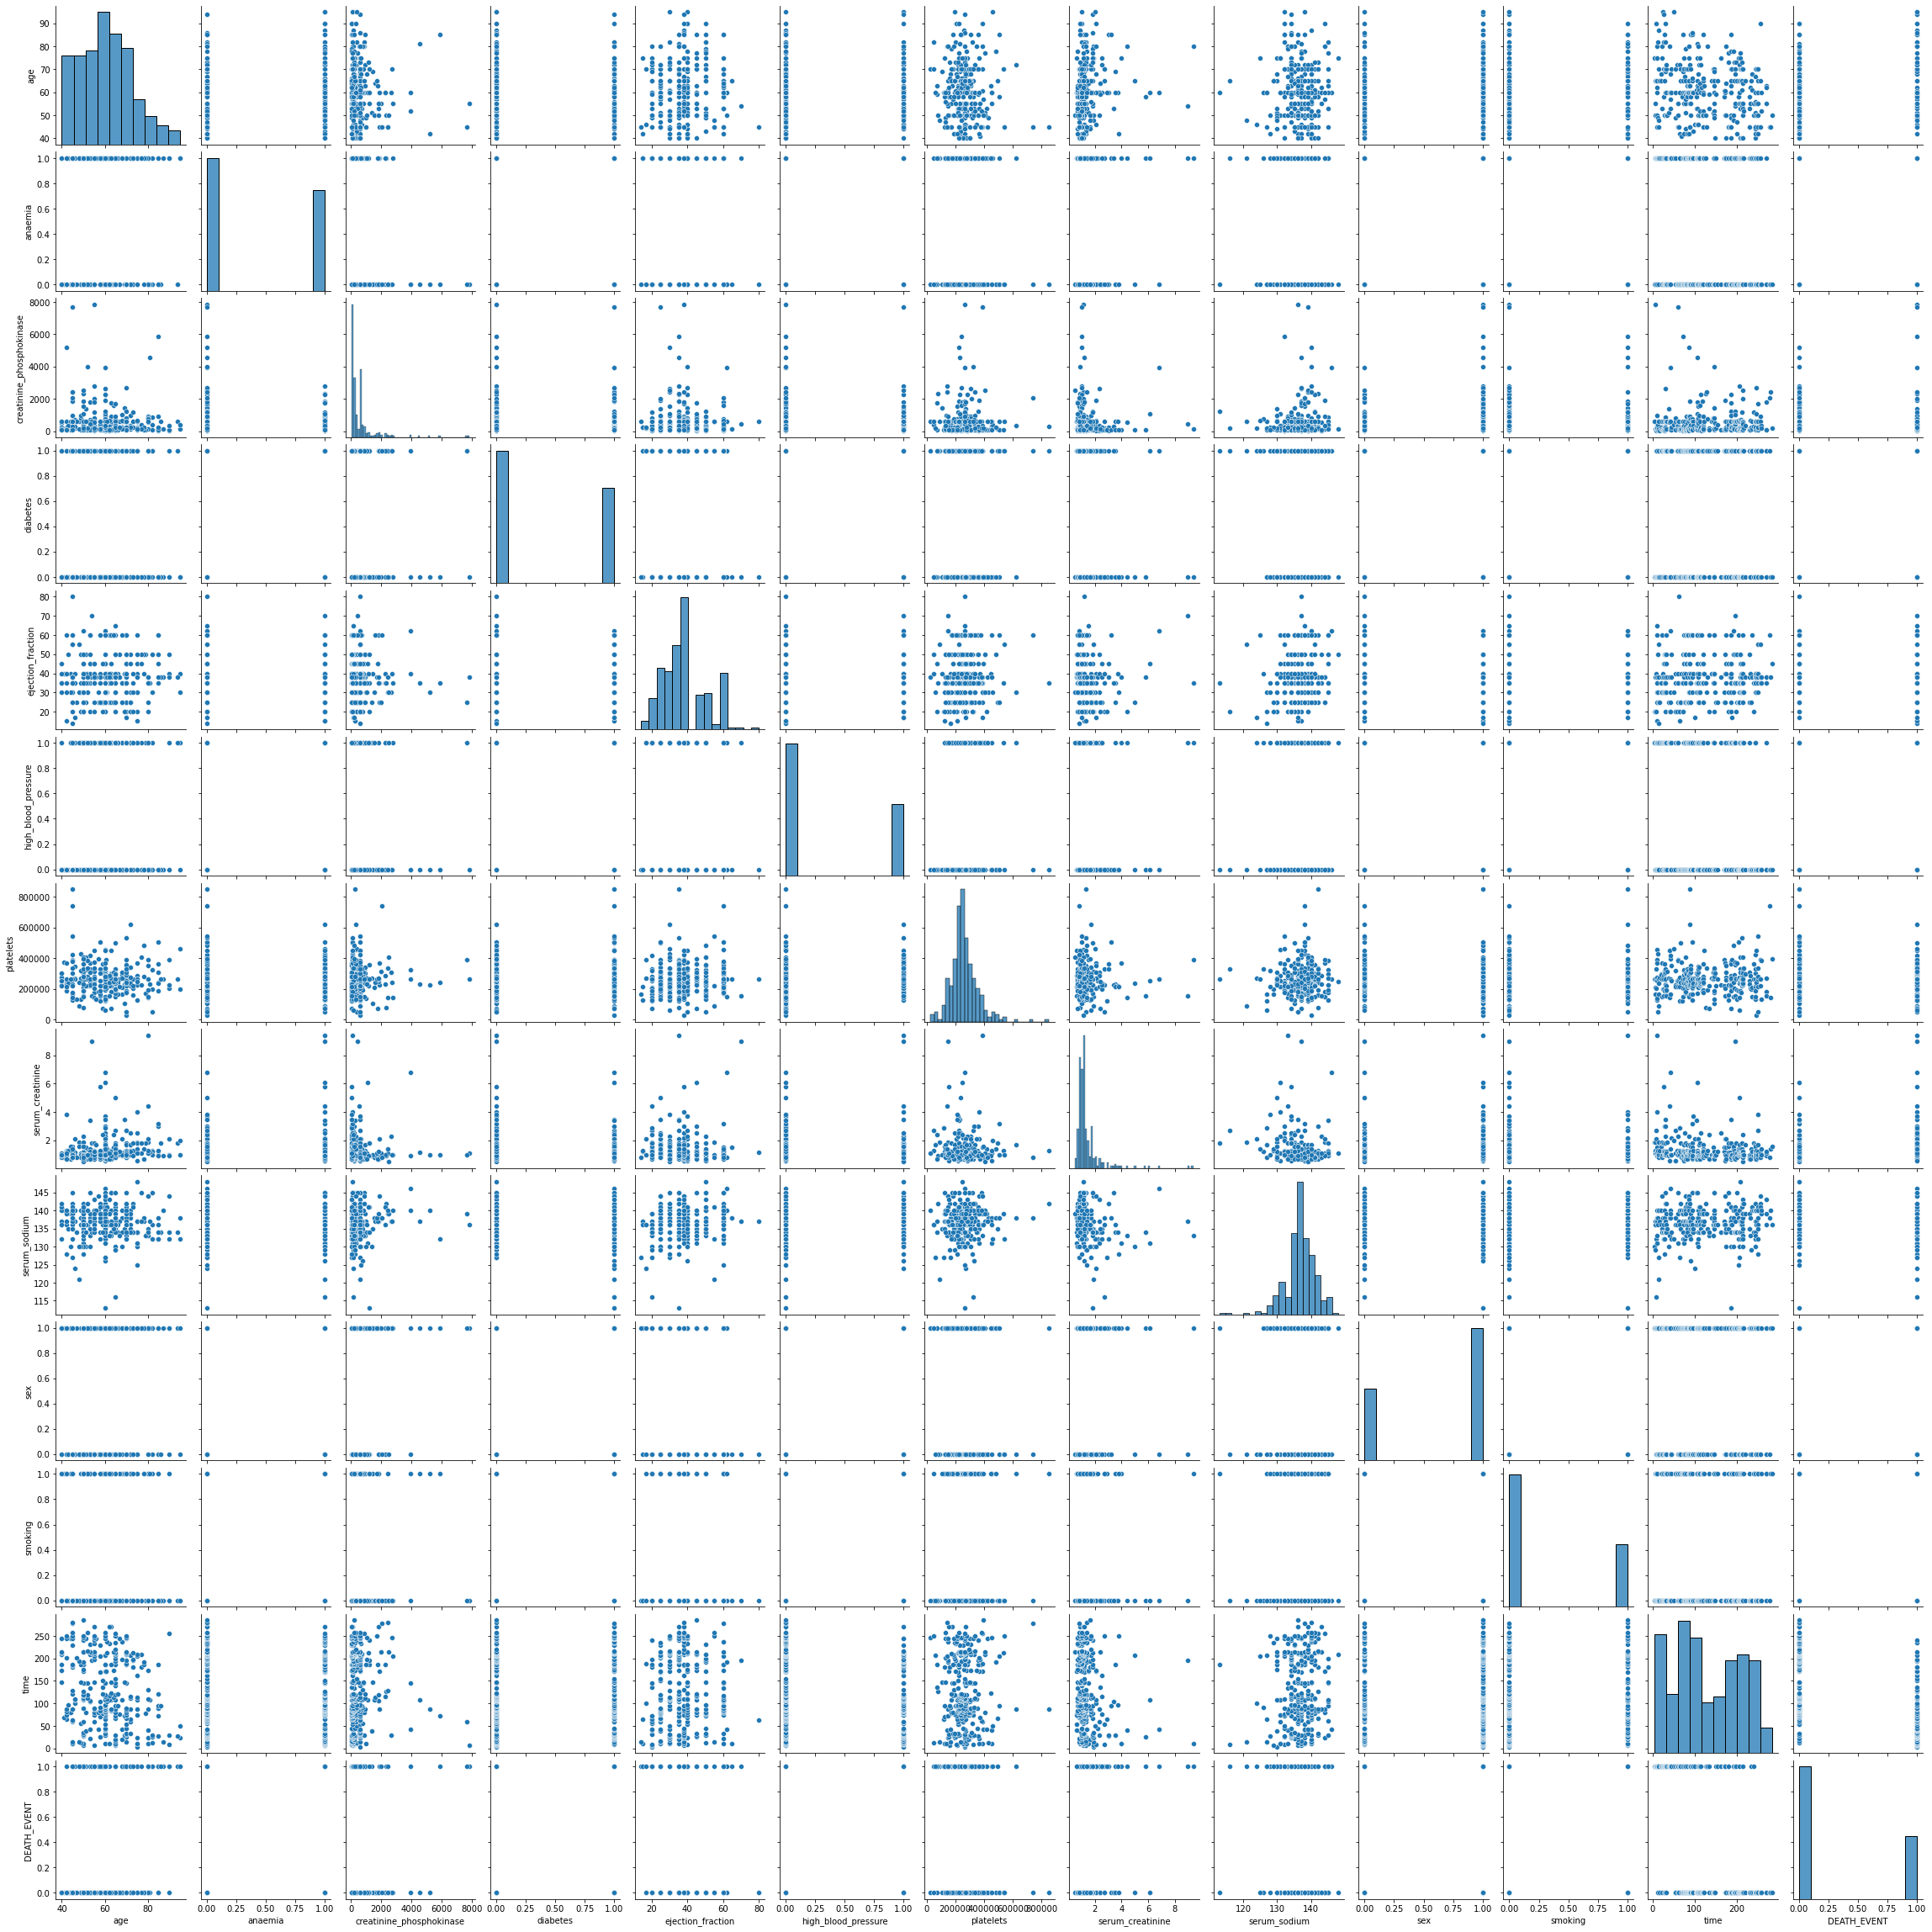

In [13]:
sns.pairplot(data = df)

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

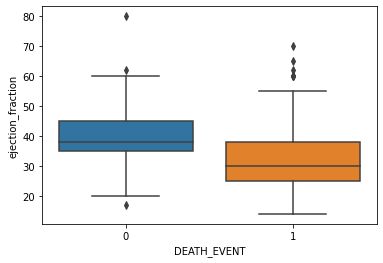

In [48]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능

sns.boxplot(data = df, x = 'DEATH_EVENT', y = 'ejection_fraction')

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

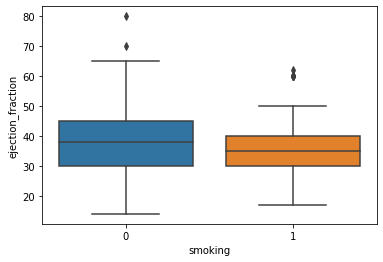

In [50]:
sns.boxplot(data = df, x = 'smoking', y = 'ejection_fraction')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

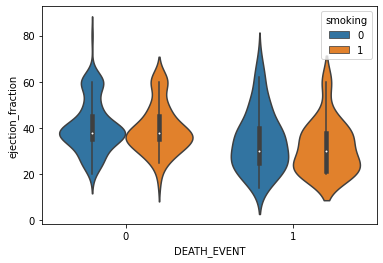

In [52]:
sns.violinplot(data = df, x = 'DEATH_EVENT', y = 'ejection_fraction', hue = 'smoking')

In [55]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

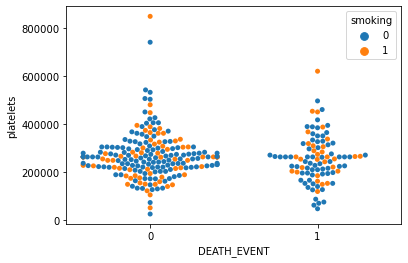

In [56]:
sns.swarmplot(data = df, x = 'DEATH_EVENT', y = 'platelets', hue = 'smoking')

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = 
X_cat = 
y = 

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler =
X = 

### 문제 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = 




### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = 




### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 13. 특징의 중요도 확인하기


In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot





## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)





### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)



